# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
df = data.copy()

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [7]:
df.shape

(10127, 21)

* There's 10127 rows and 21 columns in the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* The data consists of integers and objects
* We're also missing values from the Education_Level and Marital_Status columns, we should look into imputing these columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* The `customer age` ranges from 26 to 73 
* The `credit limit` ranges 8631 to 34516. 75th percentile is 11067 while the max is 34516 which is a huge difference. 
* The `total transaction amount` ranges between 4404 and 18484 for customers. 
* The `months inactive 12 month` ranges from 2 and 6. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other? 



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### How is the total transaction amount distributed?

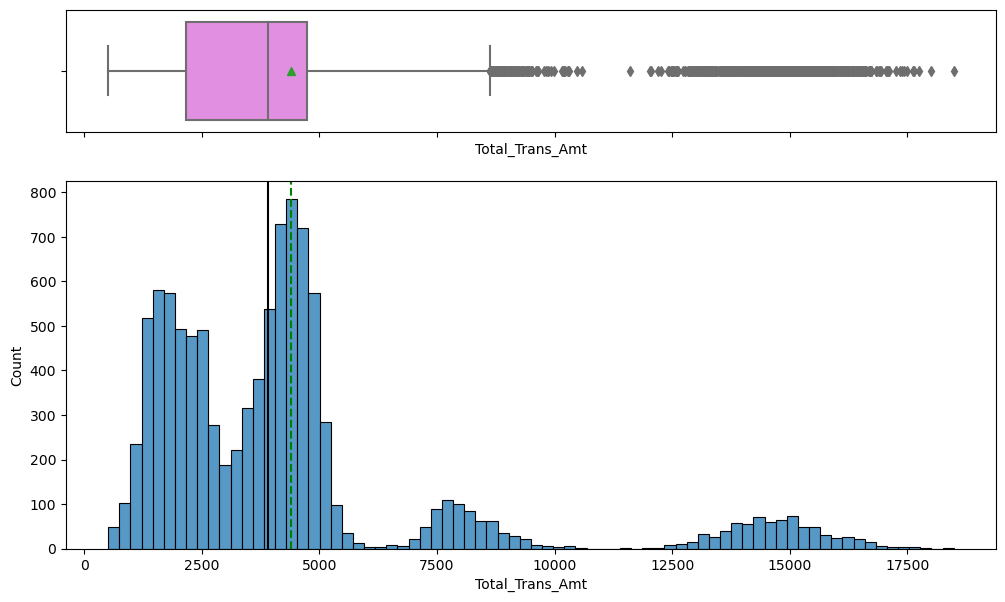

In [15]:
histogram_boxplot(df, "Total_Trans_Amt")

* Total transaction amount is heavily right skewed
* There are several outliers in the data
* The total transaction amount is about 4400 on average

### Perform log transformations on total trans amount

In [16]:
df['Total_Trans_Amt_log'] = np.log(df['Total_Trans_Amt'])

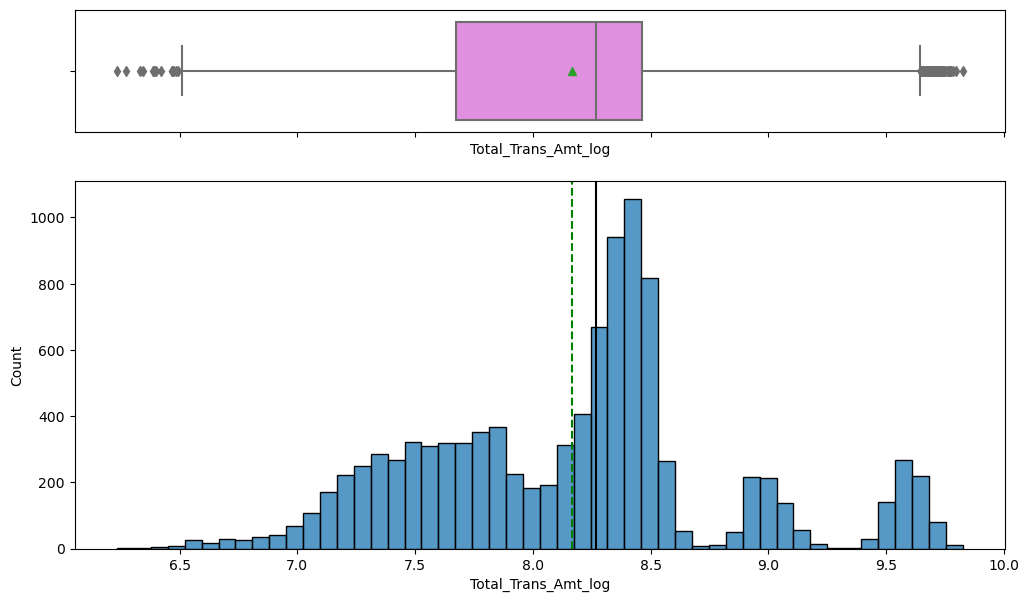

In [17]:
histogram_boxplot(df, "Total_Trans_Amt_log")

* There's still some outliers but much lower than before without running log transformations
* The distribution was originally highly right skewed but now it's starting to balance out

### How is the distribution for average open to buy?

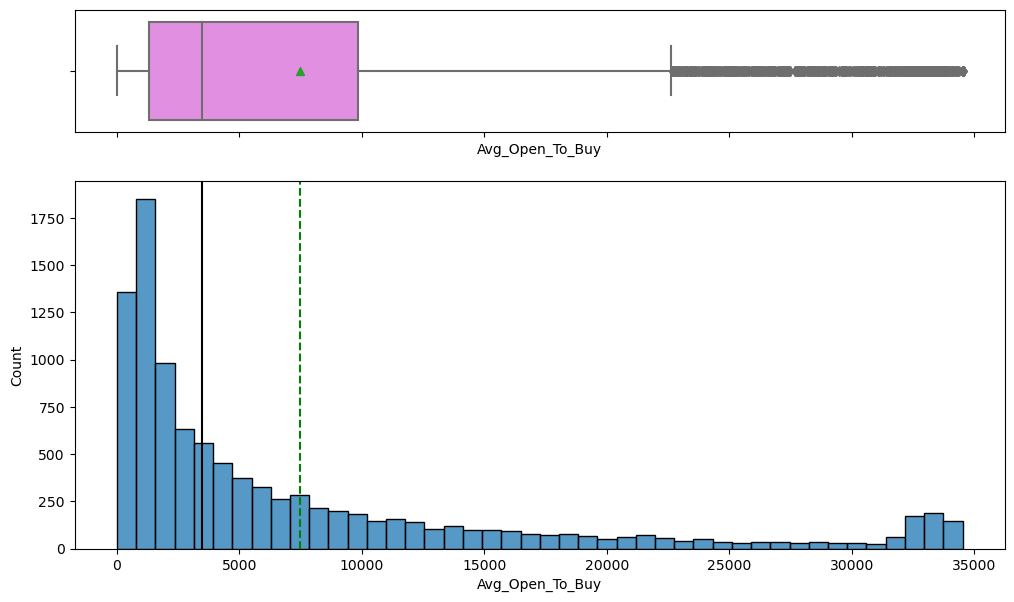

In [18]:
histogram_boxplot(df, "Avg_Open_To_Buy")

* The distribution is very right skewed with a ton of outliers, we need to clean this up a bit

### Perform log transformations on avg open to buy

In [19]:
df['Avg_Open_To_Buy_Log'] = np.log(df['Avg_Open_To_Buy'])

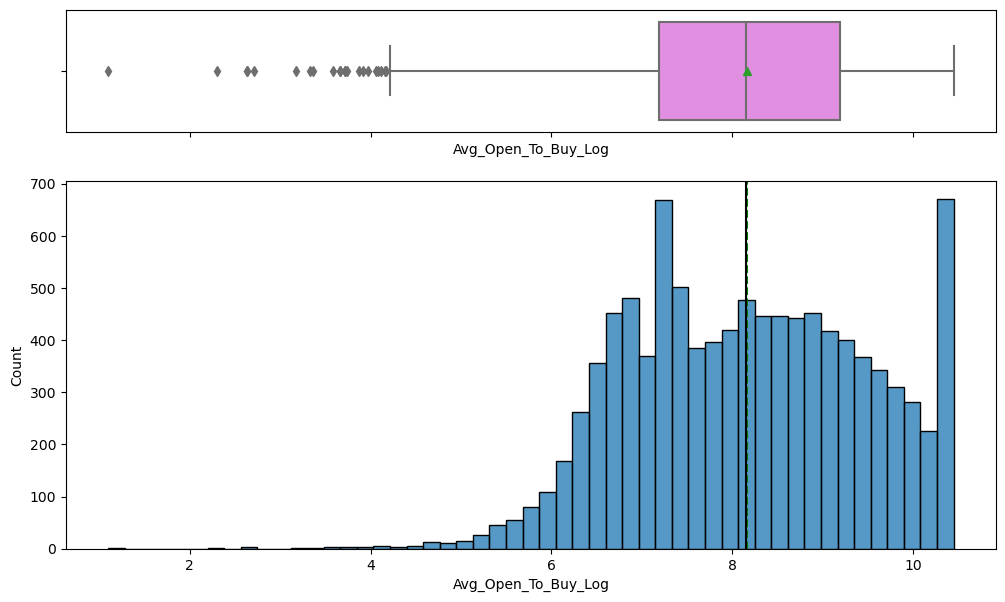

In [20]:
histogram_boxplot(df, "Avg_Open_To_Buy_Log")

* The distribution for avg open to buy is now just slighty right skewed but is showing signs of a normal distribution

### How is the distribution for credit limit?

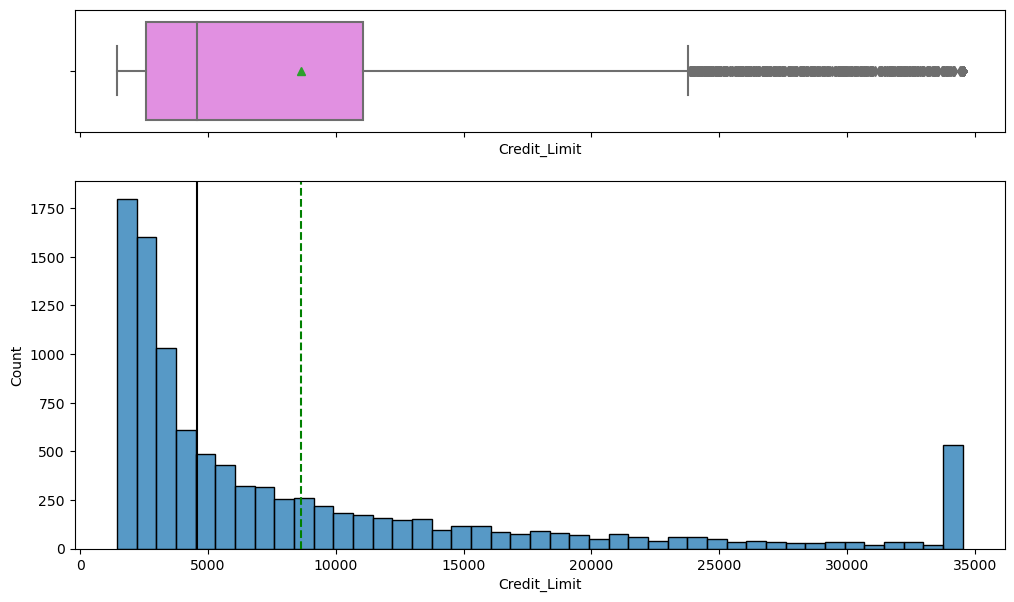

In [21]:
histogram_boxplot(df, "Credit_Limit")

* The distribution is highly right skewed
* The average credit limit is about 8600

### Perform log transformation on credit limit

In [22]:
df['Credit_Limit_Log'] = np.log(df['Credit_Limit'])

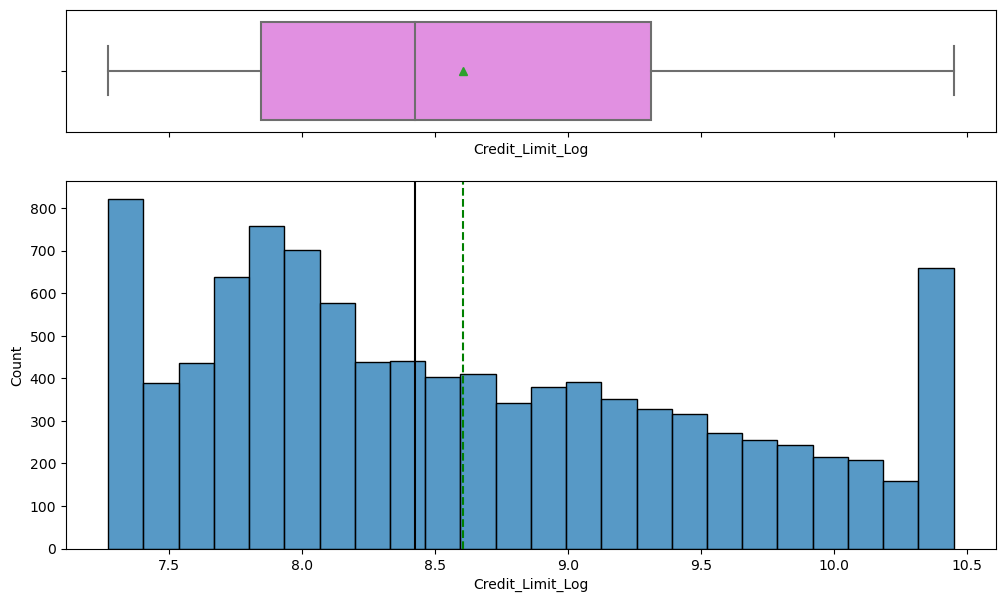

In [23]:
histogram_boxplot(df, "Credit_Limit_Log")

* This looks signficantly better than before, removing the outliers and skewness

### How is the distribution for total revolving balance?

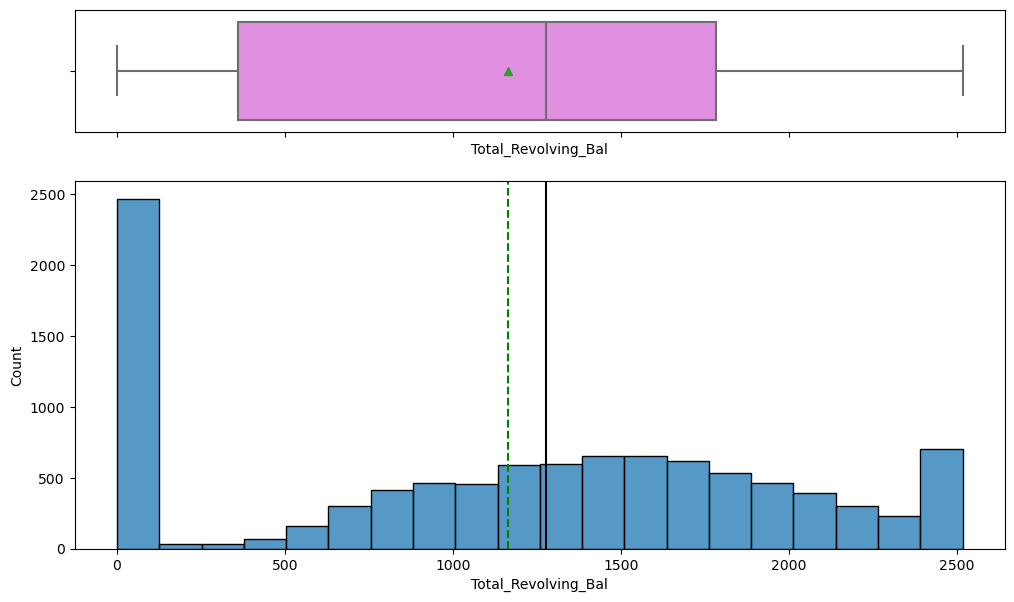

In [24]:
histogram_boxplot(df, "Total_Revolving_Bal")

* The distribution is right skewed 
* The average total revolving balance is around 1100

### What is the distribution of the level of education of customers?

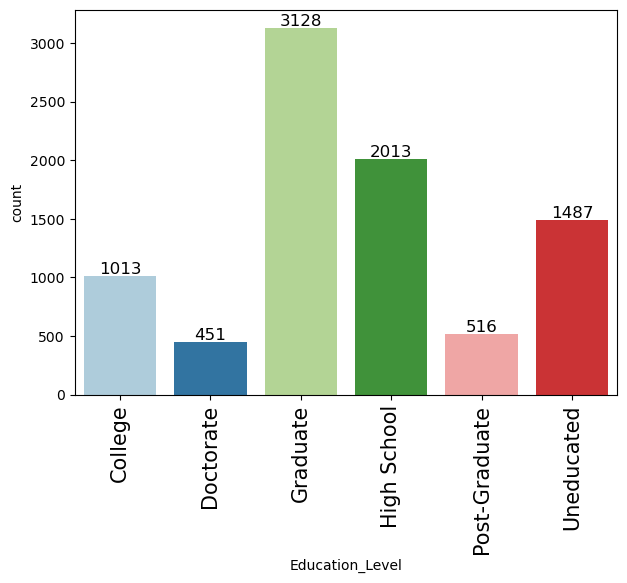

In [25]:
labeled_barplot(df, "Education_Level")

* It appears as though graduate, high school, and uneducated eductional levels are the average levels that customers fall under

### What is the distribution of the level of income of customers?

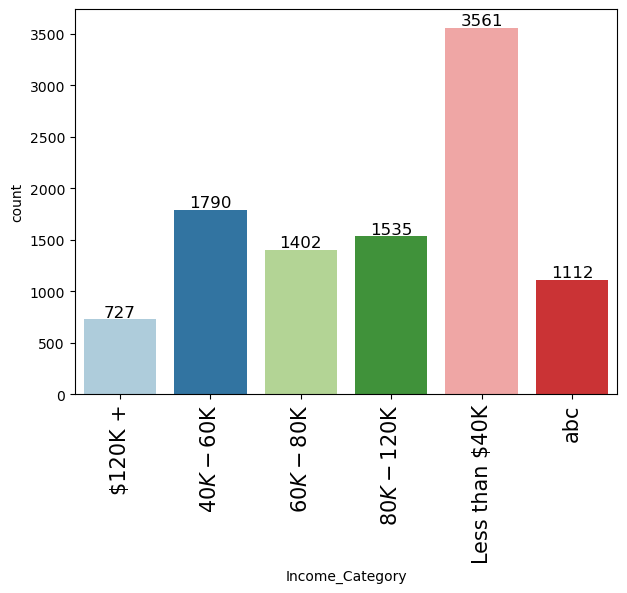

In [26]:
labeled_barplot(df, "Income_Category")

* The distribution is slightly left skewed 
* Most customers make less than 40k per year, while 40k-60k earners fall right behind

### How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

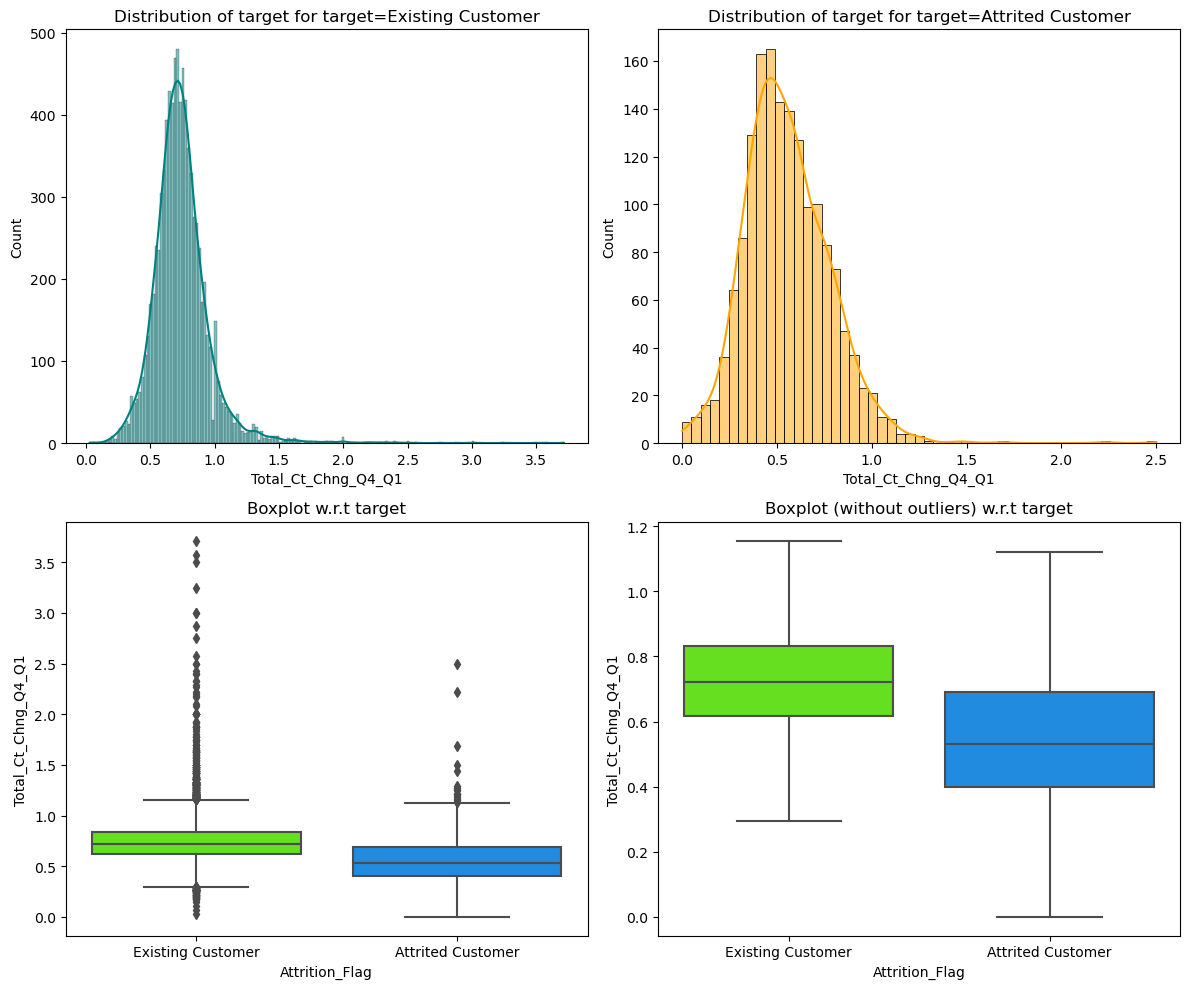

In [27]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Attrited customers transaction amount decrease far more faster than existing customers which is expected, existing customers make up majority of the transcation amounts. 

### How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

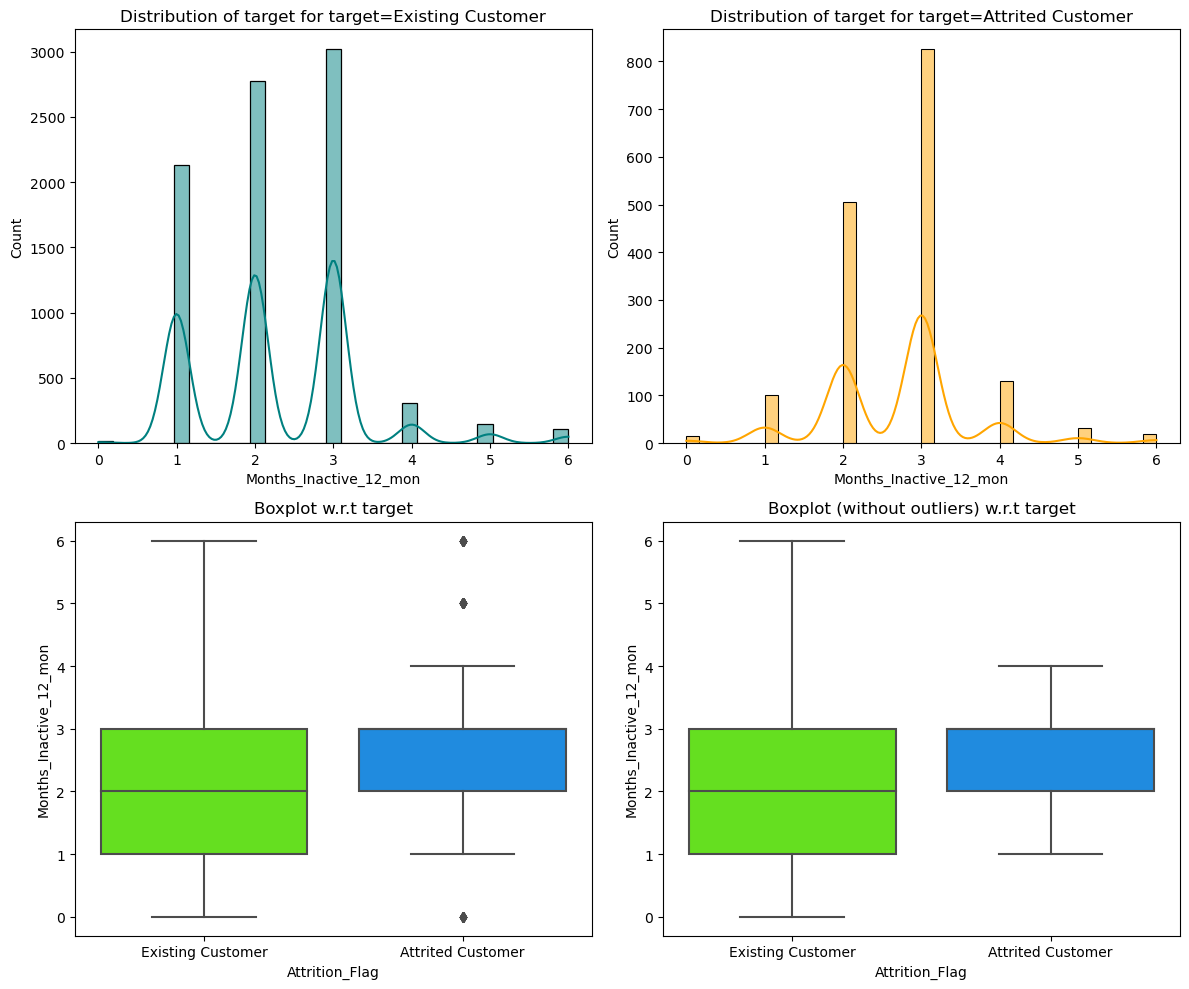

In [28]:
distribution_plot_wrt_target(df, "Months_Inactive_12_mon", "Attrition_Flag")

* Existing customers were far more inactive throughout a 12 month timespan compared to Attrited customers

### What are the attributes that have a strong correlation with each other?

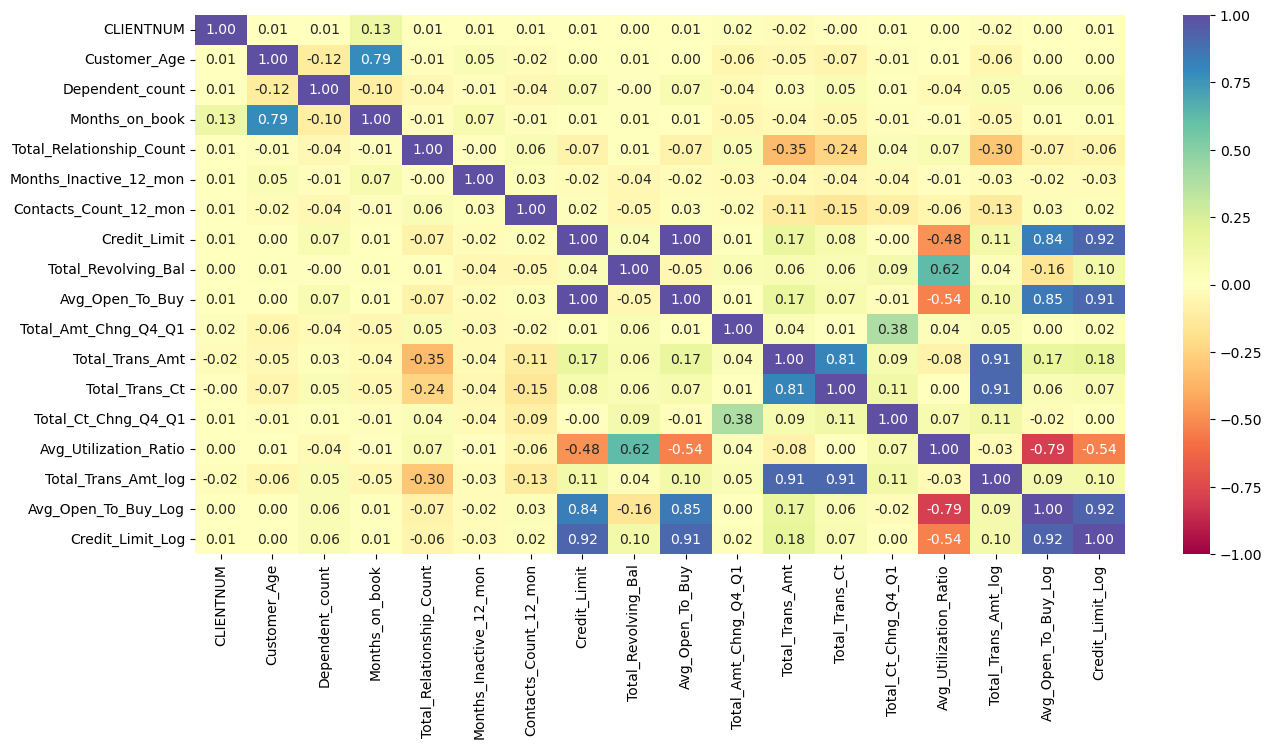

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Total_Trans_Amt and Total_Trans_Ct share high correlation
* Avg_Utilization_Ratio and Total_Revolving_Bal share above average correlation
* Months_on_book and Customer_Age share high correlation

## Data Pre-processing

In [30]:
### Drop CLIENTNUM this is not needed
df.drop(['CLIENTNUM'],axis=1,inplace=True)

### Convert objects to categories

In [31]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [33]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

* 1657 customers are attrited, which also means only 16% of customers are attrited

## Missing value imputation

In [34]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [35]:
df['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']

* Education levels contains NaN values let's treat for missing values

In [36]:
imputer = SimpleImputer(strategy='most_frequent')

In [37]:
imputer.fit(df[['Education_Level']])

SimpleImputer(strategy='most_frequent')

In [38]:
df['Education_Level'] = imputer.transform(df[['Education_Level']])
df['Education_Level'] = df['Education_Level'].astype('category')

In [39]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [40]:
imputer.fit(df[['Marital_Status']])

SimpleImputer(strategy='most_frequent')

In [41]:
df['Marital_Status'] = imputer.transform(df[['Marital_Status']])
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will churn but he does not 
2. Predicting a customer will not churn the services but he does

### Which case is more important?

* Predicting that customer will not churn but he does end up losing on a potential source of income for the bank. The bank can take actions to stop these customer from churning.

### How to reduce this loss i.e need to reduce False Negatives?

* Banks wants recall to be maximized, the greater the recall the less likely the chances of false negatives which means there's a less of a chance of predicting customers will not churn when in reality they do.

## Split data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [44]:
mapping = {"Attrited Customer": 1, "Existing Customer": 0}
df["Attrition_Flag"] = df["Attrition_Flag"].map(mapping)

In [45]:
df['Attrition_Flag'].unique()

[0, 1]
Categories (2, int64): [1, 0]

In [46]:
x = df.drop(["Attrition_Flag"], axis=1)
y = df['Attrition_Flag']

In [47]:
X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 22) (2026, 22) (2026, 22)


In [48]:
valid_labels = set(y.unique())
print(valid_labels)

{0, 1}


In [49]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data 

In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.5245901639344263
Bagging: 0.9846311475409836
Gradient Boosting: 0.875
AdaBoost: 0.826844262295082
Random Forest: 1.0

Validation Performance:

Logistic regression: 0.5797546012269938
Bagging: 0.7975460122699386
Gradient Boosting: 0.8558282208588958
AdaBoost: 0.852760736196319
Random Forest: 0.8312883435582822


Observations: It appears as though the model is overfitting the training data

### Model Building with Oversampled data


### Logistic Regression with Oversampled data

In [52]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [53]:
log_reg_over = LogisticRegression(random_state=1)
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [54]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831,0.858,0.814,0.835


### Bagging with Oversampled data

In [55]:
bag_over = BaggingClassifier(random_state=1)
bag_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [56]:
# Calculating different metrics on train set
bag_over_train_perf = model_performance_classification_sklearn(
    bag_over, X_train_over, y_train_over
)
print("Training performance:")
bag_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.998,0.998,0.998,0.998


### Adaboost with Oversampled data

In [57]:
ada_over = AdaBoostClassifier(random_state=1)
ada_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [58]:
# Calculating different metrics on train set
ada_over_train_perf = model_performance_classification_sklearn(
    ada_over, X_train_over, y_train_over
)
print("Training performance:")
ada_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962,0.967,0.958,0.963


### Random Forest with Oversampled data

In [59]:
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [60]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


### Model Building with Undersampled data

In [61]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [62]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

In [63]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.811,0.837,0.796,0.816


### Bagging with Undersampled data

In [64]:
bag_under = BaggingClassifier(random_state=1)
bag_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

In [65]:
# Calculating different metrics on train set
bag_under_train_perf = model_performance_classification_sklearn(
    bag_under, X_train_un, y_train_un
)
print("Training performance:")
bag_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996,0.992,1.000,0.996


### Adaboost with Undersampled data

In [66]:
ada_under = AdaBoostClassifier(random_state=1)
ada_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

In [67]:
# Calculating different metrics on train set
ada_under_train_perf = model_performance_classification_sklearn(
    ada_under, X_train_un, y_train_un
)
print("Training performance:")
ada_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.950,0.953,0.947,0.950


### Random Forest with Undersampled data

In [68]:
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

In [69]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


### HyperparameterTuning 

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For Logistic Regression:

```
param_grid = {'C': np.arange(0.1,1.1,0.1)}

```
- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05], 
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Tuning Decision tree with original data

In [70]:
# defining model
df_model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=df_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


### Tuning Bagging with original data

In [71]:
# defining model
bag_model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bag_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.8339665096807953:


#### Tuned bagging with original data model

In [77]:
param_grid = {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} 
bagging_tuned = BaggingClassifier(bag_model)
bagging_tuned.set_params(**param_grid)

bagging_tuned.fit(X_train, y_train)
scores = recall_score(y_train, bagging_tuned.predict(X_train))
print("Recall score: ", scores)

Recall score:  0.9508196721311475


In [78]:
tuned_bag_perf = model_performance_classification_sklearn(
    bagging_tuned, X_train, y_train
)
print("Training performance:")
tuned_bag_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.990,0.951,0.989,0.970


In [79]:
tuned_bag_test_perf = model_performance_classification_sklearn(
    bagging_tuned, X_test, y_test
)
print("Test performance:")
tuned_bag_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.862,0.943,0.900


### Tuning Adaboost with original data

In [177]:
# defining model
ada_model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8534693877551021:


#### Tuning Decision tree with oversampled data

In [178]:
# defining model
df_model_over = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=df_model_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9109661528988436:


### Tuning Bagging with oversampled data

In [179]:
# defining model
bag_model_over = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bag_model_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.9743118012661395:


#### Tuning AdaBoost with oversampled data

In [180]:
# defining model
ada_model_over = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ada_model_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 60, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9358800438723085:


#### Tuning Decision tree with undersampled data

In [181]:
# defining model
df_model_un = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=df_model_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.9539141810570383:


### Tuning Bagging with undersampled data

In [182]:
# defining model
bag_model_un = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bag_model_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


#### Tuning AdaBoost with undersampled data

In [183]:
# defining model
ada_model_un = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ada_model_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring="recall", cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9436630036630037:


## Model Comparison and Final Model Selection

In [185]:
# training performance comparison oversampled

models_train_comp_df = pd.concat(
    [
        log_reg_over_train_perf.T,
        bag_over_train_perf.T,
        ada_over_train_perf.T,
        rf_over_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Oversampled",
    "Bagging Oversampled",
    "AdaBoost Oversampled",
    "Random Forest Oversampled"
]
print("Training performance comparison oversampled:")
models_train_comp_df

Training performance comparison oversampled:


,Logistic Regression Oversampled,Bagging Oversampled,AdaBoost Oversampled,Random Forest Oversampled
Accuracy,0.831,0.998,0.962,1.000
Recall,0.858,0.997,0.967,1.000
Precision,0.815,0.998,0.958,1.000
F1,0.836,0.998,0.963,1.000


In [186]:
# training performance comparison undersampled

models_train_comp_df = pd.concat(
    [
        log_reg_under_train_perf.T,
        bag_under_train_perf.T,
        ada_under_train_perf.T,
        rf_under_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Undersampled",
    "Bagging Undersampled",
    "AdaBoost Undersampled",
    "Random Forest Undersampled"
]
print("Training performance comparison undersampled:")
models_train_comp_df

Training performance comparison undersampled:


,Logistic Regression Undersampled,Bagging Undersampled,AdaBoost Undersampled,Random Forest Undersampled
Accuracy,0.810,0.995,0.950,1.000
Recall,0.836,0.991,0.953,1.000
Precision,0.795,0.999,0.947,1.000
F1,0.815,0.995,0.950,1.000


### Test set final performance

In [190]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))

print("\n" "Test Performance:" "\n")
for name, model in models:
    model.fit(X_test, y_test)
    scores = recall_score(y_test, model.predict(X_test))
    print("{}: {}".format(name, scores))


Test Performance:

Logistic regression: 0.40615384615384614
Bagging: 0.9753846153846154
Gradient Boosting: 0.9507692307692308
AdaBoost: 0.9230769230769231
Random Forest: 1.0


## Pipelines to build the final model


In [193]:
pipe = make_pipeline(StandardScaler(), (BaggingClassifier())) 

In [194]:
pipe.steps

[('standardscaler', StandardScaler()),
 ('baggingclassifier', BaggingClassifier())]

In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier', BaggingClassifier())])

In [197]:
pipe.score(X_train, y_train)

0.997037037037037

In [198]:
pipe.score(X_test, y_test)

0.9565646594274433

# Business Insights and Conclusions

***

* If customers hold more product with the bank he/she is less likely to attrite. Banks can offer more products to such customers so that they can buy more products which will help retain such customers
* Lower transcation count on credit card, less revolving balance, less transcational amount are an indication that customer will attrite.
* Customers who have been inactive for a month show high chances of attrition, banks should focus on these type of customers.
* Average utilization ratio is lower amongst attrited customers.